# Recipes & Ratings

**Name(s)**: Tanvi Vidyala, Nithya Nair

**Website Link**:

In [148]:
import pandas as pd
import numpy as np
from pathlib import Path
import re
import plotly.express as px
pd.options.plotting.backend = 'plotly'
#from dsc80_utils import * 

## Step 1: Introduction

In [149]:
# loading datasets
recipes = pd.read_csv('RAW_recipes.csv')
interactions = pd.read_csv('RAW_interactions.csv')

#### Possible Questions
- Do recipes with higher calories have a greater number of steps?
- Are vegetarian foods more healthy?
- **Is European food healthier than North American food?** <-- PICKED

In [150]:
recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13
...,...,...,...,...,...,...,...,...,...,...,...,...
83777,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
83778,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
83779,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
83780,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [151]:
interactions

,user_id,recipe_id,date,rating,review
0,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
3,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
4,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
...,...,...,...,...,...
731922,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...
731923,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
731924,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
731925,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


## Step 2: Data Cleaning and Exploratory Data Analysis

### Merging Datasets and Adding Average Ratings

In [152]:
# merging datasets and adding avg ratings
merged = recipes.merge(
    interactions, 
    left_on='id', 
    right_on='recipe_id', 
    how='left')
merged['rating'] = merged['rating'].replace(0, np.nan)
avg_ratings = merged.groupby('id')['rating'].mean()
merged['avg_rating'] = merged['id'].map(avg_ratings)
merged[:5]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review,avg_rating
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,386585.0,333281.0,2008-11-19,4.0,"These were pretty good, but took forever to ba...",4.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,424680.0,453467.0,2012-01-26,5.0,Originally I was gonna cut the recipe in half ...,5.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,29782.0,306168.0,2008-12-31,5.0,This was one of the best broccoli casseroles t...,5.0
3,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,1196280.0,306168.0,2009-04-13,5.0,I made this for my son's first birthday party ...,5.0
4,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,768828.0,306168.0,2013-08-02,5.0,Loved this. Be sure to completely thaw the br...,5.0


### Data Cleaning

#### Objective:
- Remove duplicate recipe rows
- Split nutrition values into individual columns
- Split tags into list
- See which recipes are american and european (only keep these)
- Drop columns that aren't needed
- Needed cols: all nutrition columns, ingredients, tags
- Dropped cols: id, minutes, contributor_id, submitted, n_steps, steps, description, n_ingredients, tags, nutrition

#### Removing Duplicate Rows

In [153]:
merged_mod = merged.drop_duplicates(subset='id').reset_index(drop=True)

In [154]:
merged_mod[:5]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review,avg_rating
0,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9,386585.0,333281.0,2008-11-19,4.0,"These were pretty good, but took forever to ba...",4.0
1,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11,424680.0,453467.0,2012-01-26,5.0,Originally I was gonna cut the recipe in half ...,5.0
2,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9,29782.0,306168.0,2008-12-31,5.0,This was one of the best broccoli casseroles t...,5.0
3,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7,813055.0,286009.0,2008-04-09,5.0,don't let the calories and fat grams scare you...,5.0
4,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13,2204364.0,475785.0,2012-03-07,5.0,Delicious!!!!! -- the goat cheese made the dif...,5.0


#### Splitting Nutrition

In [155]:
merged_mod['nutrition'] = merged_mod['nutrition'].str.replace('[', '').str.replace(']', '').str.split(',')

In [156]:
# creates a new column for each piece of nutrition info in the nutrition list
merged_mod['calories (#)'] = merged_mod['nutrition'].apply(lambda x: float(x[0]))
merged_mod['total_fat (PDV)'] = merged_mod['nutrition'].apply(lambda x: float(x[1]))
merged_mod['sugar (PDV)'] = merged_mod['nutrition'].apply(lambda x: float(x[2]))
merged_mod['sodium (PDV)'] = merged_mod['nutrition'].apply(lambda x: float(x[3]))
merged_mod['protein (PDV)'] = merged_mod['nutrition'].apply(lambda x: float(x[4]))
merged_mod['saturated_fat (PDV)'] = merged_mod['nutrition'].apply(lambda x: float(x[5]))
merged_mod['carbs (PDV)'] = merged_mod['nutrition'].apply(lambda x: float(x[6]))

#### Splitting Tags

In [157]:
# takes in a STRING of a list of strings (this is what ingredients is)
# returns a simple list of strings
def split_tags(tags):
    string = tags[1:len(tags)-1]
    string = string.replace("'", "")
    string_list = string.split(', ')
    return string_list

In [158]:
# apply split tags method to tags column 
# turn the tags column into a Series of all possible tags
tags = merged_mod['tags'].apply(split_tags)
merged_copy = merged_mod.copy()
merged_copy['tags'] = tags
exploded = merged_copy['tags'].explode()

#### Only Keeping American and European Recipes

In [159]:
# find recipes tagged as american
# create column tagging these as american for future use
index = exploded[exploded == 'american'].index
american = merged_copy.iloc[index]
a_labeled = american.copy()
a_labeled['cuisine'] = 'american'

# find recipes tagged as european
# create column tagging these as european for future use
index = exploded[exploded == 'european'].index
european = merged_copy.iloc[index]
e_labeled = european.copy()
e_labeled['cuisine'] = 'european'

In [185]:
combined = pd.concat([a_labeled, e_labeled])

In [186]:
combined.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'user_id', 'recipe_id', 'date', 'rating', 'review',
       'avg_rating', 'calories (#)', 'total_fat (PDV)', 'sugar (PDV)',
       'sodium (PDV)', 'protein (PDV)', 'saturated_fat (PDV)', 'carbs (PDV)',
       'cuisine'],
      dtype='object')

#### Dropping Columns

In [187]:
combined = combined.drop(columns = ['id', 'minutes', 'contributor_id', 
                         'submitted', 'n_steps', 'steps', 'description',
                        'n_ingredients', 'user_id', 'recipe_id', 'date',
                        'tags', 'nutrition', 'review', 'avg_rating',
                        'rating'
                        ])

In [188]:
combined = combined.reset_index().drop(columns= ['index'])
combined = combined.drop_duplicates(subset=['name'])
combined[:5]

,name,ingredients,calories (#),total_fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated_fat (PDV),carbs (PDV),cuisine
0,millionaire pound cake,"['butter', 'sugar', 'eggs', 'all-purpose flour...",878.3,63.0,326.0,13.0,20.0,123.0,39.0,american
1,rter med flsk pea soup with pork,"['dried yellow peas', 'water', 'salt', 'pork',...",160.4,11.0,0.0,34.0,44.0,12.0,0.0,american
2,go to bbq sauce for ribs,"['tomato ketchup', 'dark brown sugar', 'apples...",233.5,0.0,209.0,52.0,2.0,0.0,19.0,american
3,big easy gumbo,"['vegetable oil', 'all-purpose flour', 'onion'...",484.1,42.0,7.0,32.0,75.0,31.0,6.0,american
4,cheeeezy potatoes,"['frozen southern style hash brown potatoes', ...",212.9,22.0,5.0,16.0,15.0,40.0,4.0,american


### Univariate Analysis

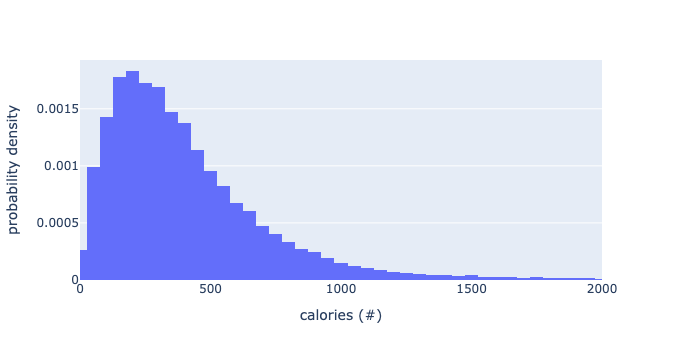

In [164]:
calories_fig = px.histogram(combined, x = 'calories (#)', histnorm='probability density')
calories_fig.update_xaxes(range=[0, 2000])
calories_fig.show()

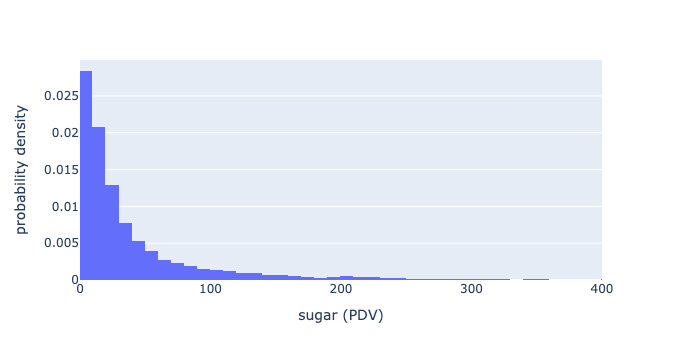

In [165]:
sugar_fig = px.histogram(combined, x = 'sugar (PDV)', histnorm='probability density')
sugar_fig.update_xaxes(range=[0, 400])
sugar_fig.show()

### Bivariate Analysis

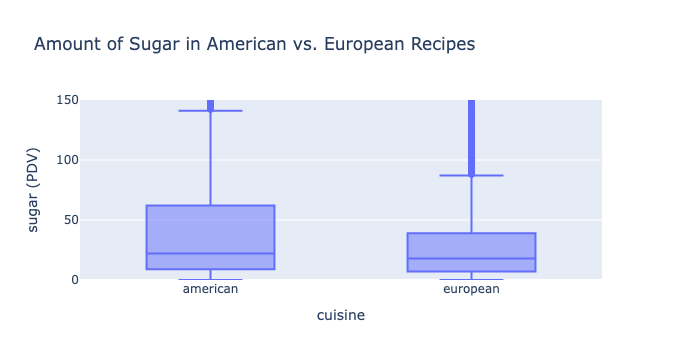

In [190]:
sugar_box = px.box(
    combined,
    x = 'cuisine',
    y = 'sugar (PDV)',
    title = 'Amount of Sugar in American vs. European Recipes'
)

# Adjusting y-axis to show the box in better detail
sugar_box.update_yaxes(range=[0, 150])
sugar_box.show()

In [167]:
sodium_box = px.box(
    combined,
    x = 'cuisine',
    y = 'sodium (PDV)',
    title = 'Amount of Sodium in American vs. European Recipes'
)

# Adjusting y-axis to show the box in better detail
sodium_box.update_yaxes(range=[0, 85])
sodium_box.show()

### Interesting Aggregates 

In [168]:
pivot_sugar = pd.pivot_table(
    combined,
    values='sugar (PDV)',
    index='cuisine',
    aggfunc=['mean', 'median', 'std', 'count']
)
pivot_sugar

,mean,median,std,count
,sugar (PDV),sugar (PDV),sugar (PDV),sugar (PDV)
cuisine,,,,
american,69.154943,22.0,185.398092,9255
european,45.113089,18.0,146.721983,8427


In [169]:
pivot_all_nut = pd.pivot_table(
    combined,
    values = ['calories (#)', 'total_fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated_fat (PDV)', 'carbs (PDV)'],
    index = 'cuisine',
    aggfunc = 'mean'
)

pivot_all_nut

,calories (#),carbs (PDV),protein (PDV),saturated_fat (PDV),sodium (PDV),sugar (PDV),total_fat (PDV)
cuisine,,,,,,,
american,453.33812,13.672177,36.218693,44.671853,34.552026,69.154943,35.912912
european,452.58029,13.396464,36.011511,43.499229,28.442388,45.113089,35.611606


## Step 3: Assessment of Missingness

The following columns have missing values: description, review, and rating

In [170]:
merged.isna().sum()

name                  1
id                    0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description         114
ingredients           0
n_ingredients         0
user_id               1
recipe_id             1
date                  1
rating            15036
review               58
avg_rating         2777
dtype: int64

In [171]:
def permutation_test_fast(df, col, n_perms=1000):
    # Binary group labels based on whether review is missing
    labels = df['rating'].isna().values  # True = missing, False = not missing
    values = df[col].values

    # Observed test statistic
    observed = abs(
        values[labels].mean() - values[~labels].mean()
    )

    stats = np.empty(n_perms)

    for i in range(n_perms):
        perm = np.random.permutation(labels)
        stats[i] = abs(
            values[perm].mean() - values[~perm].mean()
        )

    p_value = np.mean(stats >= observed)
    return p_value, stats, observed

In [173]:
# run permutation test on ratings and minutes
col = 'minutes'
p_value, stats, observed = permutation_test_fast(merged, col)
print(f'{col}: ', p_value)

minutes:  0.115


In [174]:
fig = px.histogram(stats, histnorm='probability density')
fig.add_vline(x = observed, line_color='red')
fig.update_layout(showlegend=False)
fig.show()

# the red line is the observed statistic

In [175]:
# run permutation test on ratings and n_ingredients
col = 'n_ingredients'
p_value, stats, observed = permutation_test_fast(merged, col)
print(f'{col}: ', p_value)

n_ingredients:  0.0


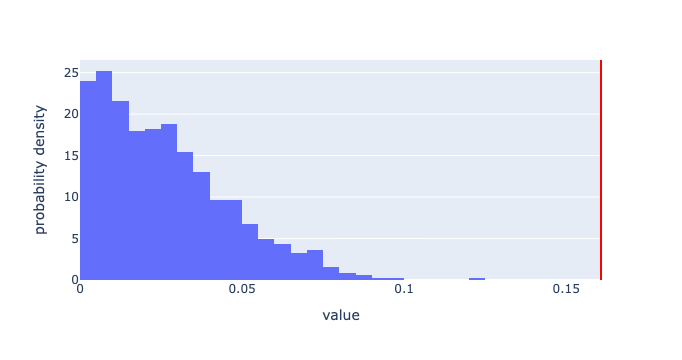

In [191]:
fig = px.histogram(stats, histnorm='probability density')
fig.add_vline(x = observed, line_color='red')
fig.update_layout(showlegend=False)
fig.show()


# the red line is the observed statistic

## Step 4: Hypothesis Testing

In [192]:
def permutation_test_df(df, value_col, label_col="cuisine",
                        group1="american", group2="european",
                        n_perms=10000):
    
    # Observed statistic
    mean1 = df[df[label_col] == group1][value_col].mean()
    mean2 = df[df[label_col] == group2][value_col].mean()
    observed = mean1 - mean2
    
    perm_stats = np.empty(n_perms)
    
    for i in range(n_perms):
        shuffled_labels = np.random.permutation(df[label_col].values)
        
        perm1 = df[value_col].values[shuffled_labels == group1]
        perm2 = df[value_col].values[shuffled_labels == group2]
        
        perm_stats[i] = perm1.mean() - perm2.mean()
    
    p_value = np.mean(perm_stats >= observed)
    
    return observed, p_value

In [193]:
# perform a permutation test on each nutrition column
cols = ['calories (#)', 'total_fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated_fat (PDV)', 'carbs (PDV)']
results = {}
for col in cols:
    stat, p = permutation_test_df(combined, col)
    print(f'{col}: ', stat, p)

calories (#):  0.757830389661649 0.4614
total_fat (PDV):  0.30130638591437986 0.3761
sugar (PDV):  24.041854392928187 0.0
sodium (PDV):  6.10963836814561 0.0
protein (PDV):  0.20718197797116744 0.3994
saturated_fat (PDV):  1.172624382652117 0.1575
carbs (PDV):  0.2757134540343529 0.2214


## Step 5: Framing a Prediction Problem

In [179]:
# TODO

## Step 6: Baseline Model

In [180]:
# TODO

## Step 7: Final Model

In [181]:
# TODO

## Step 8: Fairness Analysis

In [182]:
# TODO